## 3 Oct 2019

<strong>RULES</strong><br>
<strong>Date:</strong> Level 2 heading ## <br>
<strong>Example Heading:</strong> Level 3 heading ###<br>
<strong>Method Heading:</strong> Level 4 heading ####

### References

1. [Taan_S_Elali]_Discrete_Systems_and_Digital_Signal(z-lib.org)

### Imports

In [1]:
import numpy as np
from sympy import oo
import math
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from IPython.display import display_latex
from sympy import latex
import math
from scipy import signal

### Setup

In [2]:
sp.init_printing(use_latex = True)
    
z, f, i = sp.symbols('z f i')
x, k = sp.symbols('x k')
theta = sp.Symbol('theta')

In [3]:
# Usage: display_equation('u_x', x)
def display_equation(idx, symObj):
    if(isinstance(idx, str)):
        eqn = '\\[' + idx + ' = ' + latex(symObj) + '\\]'
        display_latex(eqn, raw=True)
    else:
        eqn = '\\[' + latex(idx) + ' = ' + latex(symObj) + '\\]'
        display_latex(eqn, raw=True)
    return

In [4]:
# Usage: display_full_latex('u_x')
def display_full_latex(idx):
    if(isinstance(idx, str)):
        eqn = '\\[' + idx + '\\]'
        display_latex(eqn, raw=True)
    else:
        eqn = '\\[' + latex(idx) + '\\]'
        display_latex(eqn, raw=True)
    return

In [5]:
def sum_of_GP(a, r):
    return sp.simplify(a/(1-r))

In [6]:
def display_ztrans(f, k, limits = (-4, 4)):
    F = sp.summation(f/z**k, ( k, -oo, oo ))
    display_equation('f(k)', f)
    display_equation('F(k)_{\infty}', F)

    F = sp.summation(f/z**k, (k, limits[0], limits[1]))
    display_equation('F(k)_{'+ str(limits[0]) + ',' + str(limits[1]) + '}', F)
    return

In [7]:
# Credit: https://www.dsprelated.com/showcode/244.php
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='b', markerfacecolor='b')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

### Discrete Fourier Transform

In [8]:
display_full_latex('X(\\theta) = \sum_{-\infty}^{\infty} x[n]e^{j(\\theta)n}')

### [1] Example 3.8

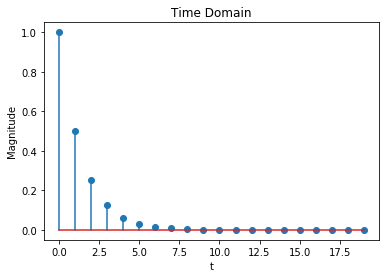

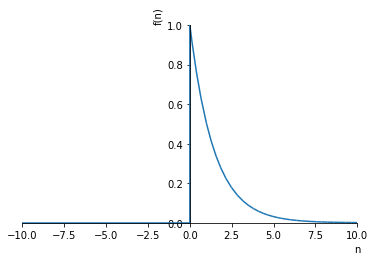

In [9]:
# Symbolic
n = sp.Symbol('n')
fs = (0.5 ** n) * sp.Heaviside(n)
# or
#f = sp.Piecewise((0, n < 0), (f1, n >= 0))

display_equation('x(n)', fs)
q = sum_of_GP(1, 0.5 * sp.exp(-theta))
display_equation('X(\\theta)', q)

# Numeric
max = 20
t = np.arange(0, max, 1)
f = np.power(0.5, t)
plt.stem(t, f)
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.title('Time Domain')

# Symbolic
sp.plot(fs, (n, -10, 10))